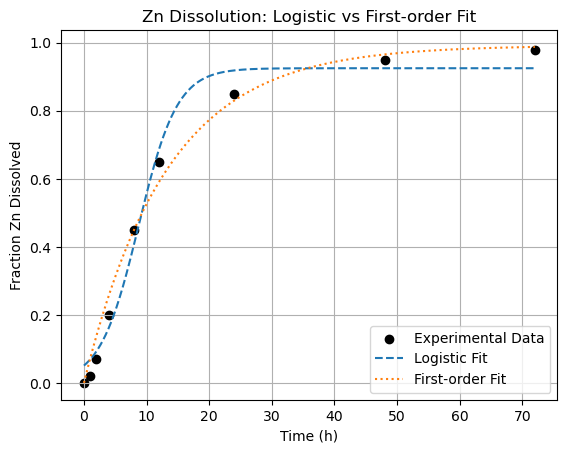

R² (Logistic): 0.9861
R² (First-order): 0.9886


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Example data — replace with your actual measurements
time_data = np.array([0, 1, 2, 4, 8, 12, 24, 48, 72])  # hours
fraction_dissolved = np.array([0.00, 0.02, 0.07, 0.20, 0.45, 0.65, 0.85, 0.95, 0.98])

# Logistic function
def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# First-order dissolution model: C(t) = C_inf * (1 - exp(-kt))
def first_order(t, C_inf, k):
    return C_inf * (1 - np.exp(-k * t))


    # Logistic fit
popt_log, _ = curve_fit(logistic, time_data, fraction_dissolved, p0=[1, 0.1, 20])

# First-order fit
popt_1st, _ = curve_fit(first_order, time_data, fraction_dissolved, p0=[1, 0.1])

t_fit = np.linspace(0, max(time_data), 500)
log_fit = logistic(t_fit, *popt_log)
first_order_fit = first_order(t_fit, *popt_1st)

plt.scatter(time_data, fraction_dissolved, color='black', label='Experimental Data')
plt.plot(t_fit, log_fit, label='Logistic Fit', linestyle='--')
plt.plot(t_fit, first_order_fit, label='First-order Fit', linestyle=':')
plt.xlabel('Time (h)')
plt.ylabel('Fraction Zn Dissolved')
plt.title('Zn Dissolution: Logistic vs First-order Fit')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import r2_score

r2_logistic = r2_score(fraction_dissolved, logistic(time_data, *popt_log))
r2_first_order = r2_score(fraction_dissolved, first_order(time_data, *popt_1st))

print(f"R² (Logistic): {r2_logistic:.4f}")
print(f"R² (First-order): {r2_first_order:.4f}")

